# Assignment 2 - Classification

In this assignment, you will gain hands-on coding experience by working on a classification task. **(10 Points)**

This notebook will guide you through using logistic regression, LDA, and QDA for classification tasks.

**Objectives:**
- Apply logistic regression for binary classification.
- Understand the differences between LDA and QDA.
- Apply LDA and QDA for multivariate data.

---

Hongxu Zhou  
Yujie Luo

## Imports and Plotting Function
Make sure you have installed all the necessary packages listed in the following cell.

In [1]:
## Import necessary packages
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split


In [2]:
# This block consists of the functions for LDA/QDA visualisation, don't change.

cmap = mpl.colormaps['coolwarm']

def plot_ellipse(mean, cov, color, ax):
    v, w = np.linalg.eigh(cov)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(
        mean,
        2 * v[0] ** 0.5,
        2 * v[1] ** 0.5,
        angle=180 + angle,
        facecolor=color,
        edgecolor="black",
        linewidth=2,
    )
    ell.set_clip_box(ax.bbox)
    ell.set_alpha(0.4)
    ax.add_artist(ell)


def plot_result(estimator, X, y, ax):
    DecisionBoundaryDisplay.from_estimator(
        estimator,
        X,
        response_method="predict_proba",
        plot_method="pcolormesh",
        ax=ax,
        cmap=cmap,
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        estimator,
        X,
        response_method="predict_proba",
        plot_method="contour",
        ax=ax,
        alpha=1.0,
        levels=[0.5],
    )
    y_pred = estimator.predict(X)
    X_right, y_right = X[y == y_pred], y[y == y_pred]
    X_wrong, y_wrong = X[y != y_pred], y[y != y_pred]
    ax.scatter(X_right[:, 0], X_right[:, 1], c=y_right, s=20, cmap=cmap, alpha=0.5)
    ax.scatter(
        X_wrong[:, 0],
        X_wrong[:, 1],
        c=y_wrong,
        s=30,
        cmap=cmap,
        alpha=0.9,
        marker="x",
    )
    ax.scatter(
        estimator.means_[:, 0],
        estimator.means_[:, 1],
        c="yellow",
        s=200,
        marker="*",
        edgecolor="black",
    )

    if isinstance(estimator, LinearDiscriminantAnalysis):
        covariance = [estimator.covariance_] * 2
    else:
        covariance = estimator.covariance_
    plot_ellipse(estimator.means_[0], covariance[0], cmap(0.0), ax)
    plot_ellipse(estimator.means_[1], covariance[1], cmap(1.0), ax)

    ax.set_box_aspect(1)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set(xticks=[], yticks=[])

## Logistic Regression for Classification

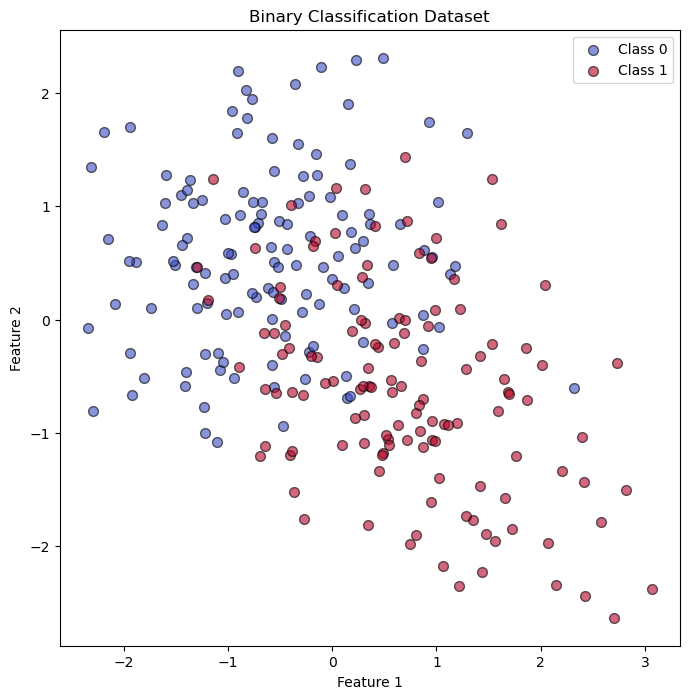

In [3]:
# Generate a synthetic dataset
X, y = make_classification(
    n_samples = 256, 
    n_features = 2,
    n_redundant = 0,
    n_informative = 2, 
    n_clusters_per_class = 1, 
    class_sep = 0.6, # Be aware, the 0.6 here means the data points should be fairly separated, so if you see them mashed together, we do something wrong.
    random_state = 37
)

# Visualize the dataset
plt.figure(figsize=(8,8))
# Plot the points for Class 0
plt.scatter(X[y == 0, 0], X[y == 0, 1], color=cmap(0.0), s=50, label='Class 0', alpha=0.6, edgecolors='k')
# Plot the points for Class 1
plt.scatter(X[y == 1, 0], X[y == 1, 1], color=cmap(1.0), s=50, label='Class 1', alpha=0.6, edgecolors='k')
plt.title('Binary Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(['Class 0', 'Class 1'])
plt.show()

**Task 1:** Check the outputs of the logistic regression model on the test set. To this end, plot a histogram of the outputs for each ground-truth class. Additionally, plot the decision threshold as a vertical line in the histograms. Label your plots and briefly describe the axes and their contents. **(2 Points)**

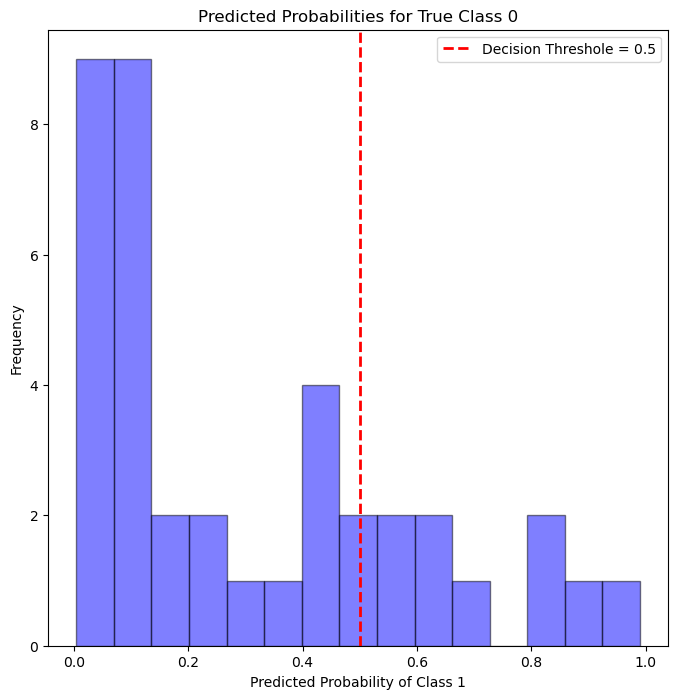

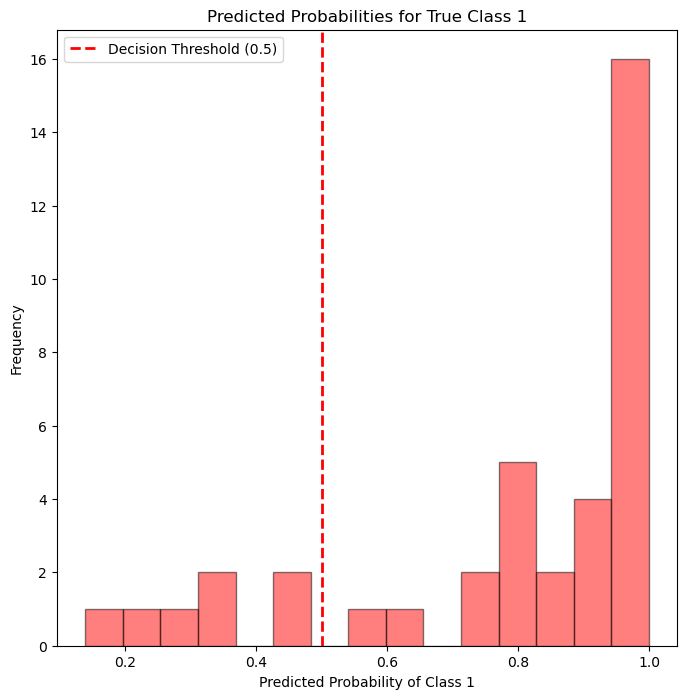

In [17]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a linear regression model
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_prob_all = logistic_regressor.predict_proba(X_test)

# Select the probabilities per class
y_pred_prob_class_0 = y_pred_prob_all[y_test == 0, 1]
y_pred_prob_class_1 = y_pred_prob_all[y_test == 1, 1]

# TODO: Plot the histogram of predicted probabilities for each class. Be sure to provide a title for each plot and label the axes.
plt.figure(figsize=(8, 8))
plt.hist(y_pred_prob_class_0, 
         bins=15,  # The `bins` controls the number of "data buckets", try different numbers and see how it changes our vis.
         color="blue", # This looks more like purple i dont know why.
         alpha=0.5, # This controls the opacity.
         edgecolor="black")
plt.axvline(x=0.5, color="red", linestyle="--", linewidth=2, label="Decision Threshole = 0.5") # "axvline" draws a vertical line on x-axis, for a horizontal line, use `vline`. 
plt.title("Predicted Probabilities for True Class 0")
plt.xlabel("Predicted Probability of Class 1")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# TODO: For each class, also plot the decision threshold at 0.5 as a vertical (dashed) line.
plt.figure(figsize=(8, 8))
plt.hist(y_pred_prob_class_1, bins=15, color='red', alpha=0.5, edgecolor='black') # Change the colour to differentiate
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Decision Threshold (0.5)')
plt.title('Predicted Probabilities for True Class 1')
plt.xlabel('Predicted Probability of Class 1')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Briefly describe the Plots:**  
These two histograms visualise the logistic regression model's predicted probabilities on the test set, separated by the TRUE class of each sample. The red line in each plot represents the decision threshold of 0.5.  

Plot 1 shows the probabilities for TRUE Class 0. It demonstrates samples that are *actually* Class 0. The model is performing well, in that most of the samples are given a probability below 0.5 (on the left side). It means the model correctly predicted. However, we still see a few points to the right of the threshold, which are false positives. In other words, the model misclassified them as Class 1 while they should be Class 0. This is Type I error.  

Plot 2 visualises the predicted probabilities for True Class 1. This plot shows that the model has consistently good performance. Most samples are given a probablity above 0.5, meaning they are correctly predicted as Class 1. This shows the model's high confidence. The few samples to the left of the threshold are false negatives, being misclassified as Class 0. This is Type II Errors.

**Task 2**: Convert the predicted probabilities to binary class labels using a threshold of $0.5$. Based on the resulting confusion matrix, compute the Type I and Type II error rates. **(1.5 Points)**

Accuracy of the Linear Regression Classifier: 0.77


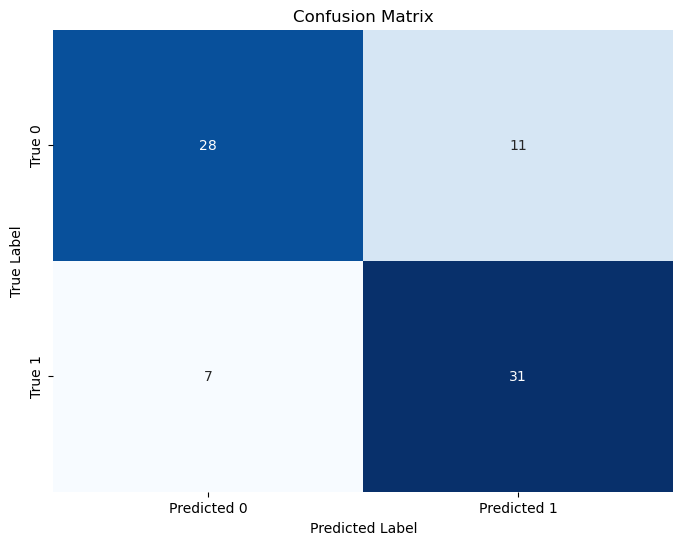

Type I Error Rate (False Positive Rate): 0.28
Type II Error Rate (False Negative Rate): 0.18


In [22]:
y_pred_prob = y_pred_prob_all[:, 1]
# TODO: Convert the predicted probabilities to binary class labels using a threshold of 0.5.
y_pred_class = (y_pred_prob >0.5).astype(int)

'''
A little explanation here about the `.astype(int)`.
Without it, the code can still correctly execute, but we add it here following the best practice.
The reason why it can execute is that SKlearn is smart to handle this. 
`y_pred_prob > 0.5` is a NumPy function that traverses all the probability values in the array `y_pred_prob`. 
If a probability is larger than 0.5, it returns a `True`, otherwise a `False`.
Thus, we have an array consisting of boolean values (T/F). 
So, we use `.astype(int)` to change the data type. The rule is "True = 1; False = 0". 
As a result, all the predictions that are larger than 0.5 are Class 1; otherwise, Class 0.
'''

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_class)
print(f'Accuracy of the Linear Regression Classifier: {accuracy:.2f}')

# Get the confusion matrix
cm_matrix = confusion_matrix(y_test, y_pred_class)

# Visualize the confusion matrix with a heatmap
cm_matrix_df = pd.DataFrame(cm_matrix, index=['True 0', 'True 1'], columns=['Predicted 0', 'Predicted 1'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_matrix_df, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

FP = cm_matrix[0, 1]  # False Positives
FN = cm_matrix[1, 0]  # False Negatives
TN = cm_matrix[0, 0]  # True Negatives
TP = cm_matrix[1, 1]  # True Positives

# TODO: Compute the Type I and Type II error rates
type1_error_rate = FP/(FP+TN)
type2_error_rate = FN/(FN+TP)

print(f'Type I Error Rate (False Positive Rate): {type1_error_rate:.2f}')
print(f'Type II Error Rate (False Negative Rate): {type2_error_rate:.2f}')


**Task 3:** In Task 1, you created 2 plots (one per class), each divided along the x-axis into two decision regions by the decision threshold. Overall, this results in 4 regions. Identify which regions contain the predictions for True Negatives (TN), True Positives (TP), and False Negatives (FN). **(1.5 Points)**

*I don't quite understand the question*

- TN: This region is in Plot 1 (True Class 0), containing the samples with a predicted probability < 0.5.
- TP: This region is in Plot 2 (True Class 1), containing the samples with a predicted probability > 0.5
- FN: This region is in Plot 2 (True Class 1), containing the samples with a predicted probability < 0.5.

**Task 4:** Determine (and visualize) the correct predictions. **(1 Point)**

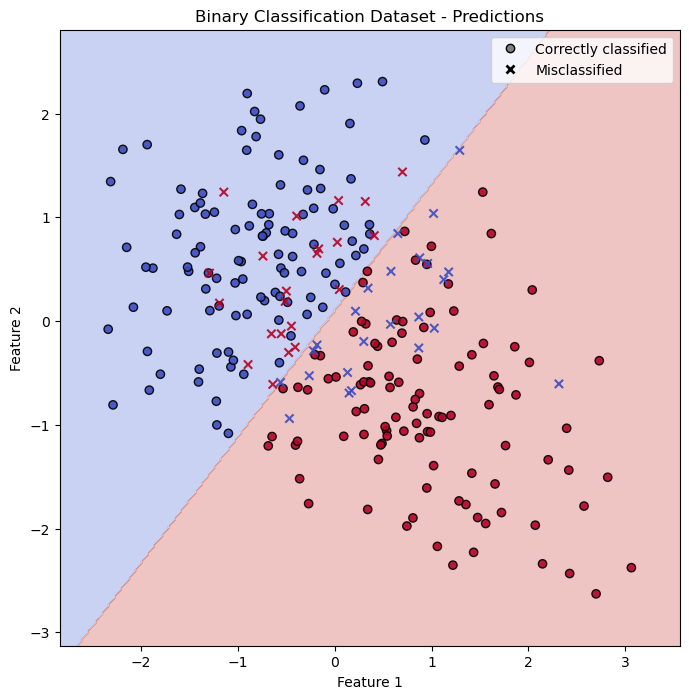

In [23]:
# TODO: Assign correctly classified points to `X_right` and their corresponding labels to `y_right`. Then do the same for wrongly classified points.
"""
The code that I wrote
"""
y_pred_full = logistic_regressor.predict(X)
mask_correct = (y_pred_full == y)

X_right, y_right = X[mask_correct], y[mask_correct] # TODO
X_wrong, y_wrong = X[~mask_correct], y[~mask_correct] # TODO

# Visualize the decision boundaries
# Define the mesh grid
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Plot the decision boundary for logistic regression
Z = logistic_regressor.predict(np.c_[xx.ravel(), yy.ravel()]) # Predict using logistic regression on the mesh grid
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(
    X_right[:, 0], 
    X_right[:, 1], 
    c=y_right, 
    cmap='coolwarm', 
    alpha=0.9, 
    label='Correctly classified', 
    edgecolors='k'
)
plt.scatter(
    X_wrong[:, 0],
    X_wrong[:, 1],
    c=y_wrong,
    cmap='coolwarm',
    alpha=0.9,
    marker="x",
    label='Misclassified'
)

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', linestyle='', label='Correctly classified',
           markerfacecolor='gray', markeredgecolor='k', markersize=6),
    Line2D([0], [0], marker='x', linestyle='', label='Misclassified', markeredgewidth=2.0,
           markeredgecolor='black', markersize=6)
]

plt.legend(handles=legend_elements, loc='upper right')

plt.title('Binary Classification Dataset - Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Exploring Gaussian-Distributed Data: LDA and QDA

Below, we generate three datasets, each drawn from different two-dimensional Gaussian distributions.

First, we define a function to generate synthetic data. It creates two blobs centered
at $(0, 0)$ and $(1, 1)$. Each blob is assigned a specific class. The dispersion of
the blobs is controlled by the parameters `transform_class_1` and `transform_class_2`, 
which are transformation matrices applied to the samples of each class. These 
transformation matrices shape the data distribution by inducing specific covariance 
matrices of the form $A^T A$. Thus, by applying different transformations to each class, we can
generate datasets from Gaussian distributions with different covariance matrices 
for each class.


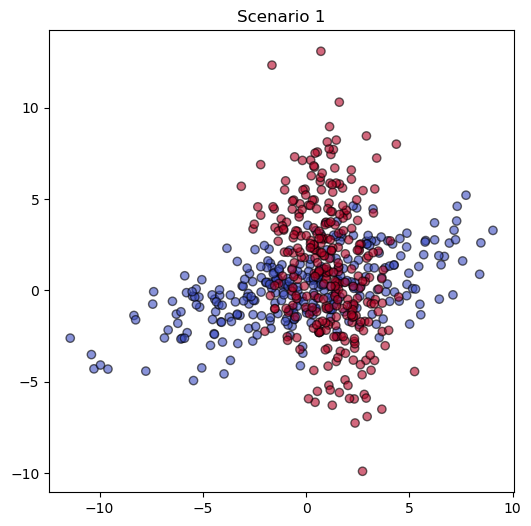

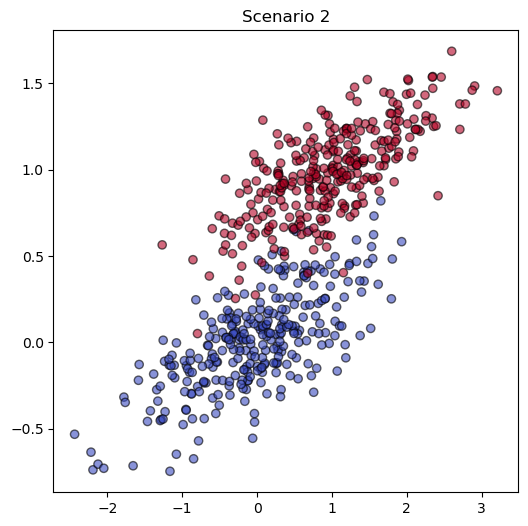

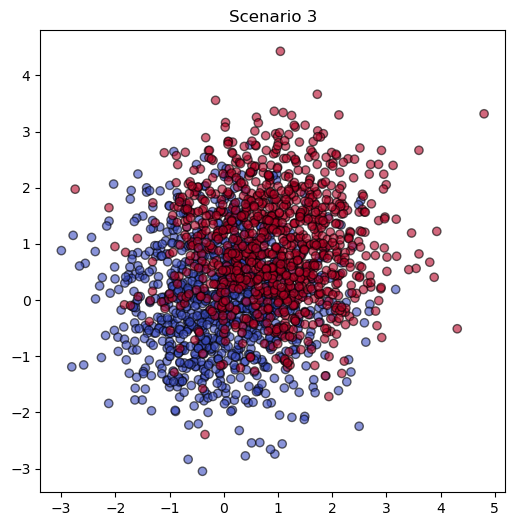

In [25]:
def make_data(n_samples, n_features, transform_class_1, transform_class_2, seed=0):
    rng = np.random.RandomState(seed)
    X = np.concatenate(
        [
            rng.randn(n_samples, n_features) @ transform_class_1,
            rng.randn(n_samples, n_features) @ transform_class_2 + np.array([1, 1]),
        ]
    )
    y = np.concatenate([np.zeros(n_samples), np.ones(n_samples)])
    return X, y


transform_matrix = np.array([[1, 0], [0, 1]])
X_3, y_3 = make_data(
    n_samples=1_000,
    n_features=2,
    transform_class_1=transform_matrix,
    transform_class_2=transform_matrix,
    seed=0,
)
transform_matrix = np.array([[0.0, -0.2], [0.8, 0.2]])
X_2, y_2 = make_data(
    n_samples=300,
    n_features=2,
    transform_class_1=transform_matrix,
    transform_class_2=transform_matrix,
    seed=0,
)
transform_matrix_1 = np.array([[0.0, -1.0], [2.5, 0.7]]) * 1.5
transform_matrix_2 = transform_matrix_1.T
X_1, y_1 = make_data(
    n_samples=300,
    n_features=2,
    transform_class_1=transform_matrix_1,
    transform_class_2=transform_matrix_2,
    seed=0,
)

# Plot the datasets
plt.figure(figsize=(6, 6))
plt.scatter(X_1[:, 0], X_1[:, 1], c=y_1, cmap='coolwarm', edgecolors='k', alpha=0.6)
plt.title('Scenario 1')
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(X_2[:, 0], X_2[:, 1], c=y_2, cmap='coolwarm', edgecolors='k', alpha=0.6)
plt.title('Scenario 2')
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(X_3[:, 0], X_3[:, 1], c=y_3, cmap='coolwarm', edgecolors='k',alpha=0.6)
plt.title('Scenario 3')
plt.show()


**Task 5:** Match each scenario with the corresponding case below. **(1 Point)**

- shared, non-isotropic covariance: Scenario 2
- different covariance: Scenario 1
- shared, isotropic covariance: Scenario 3

### Remember LDA and QDA:

- **Multivariate LDA**:
$$
P(y = k \mid \mathbf{x}) \propto \exp\left( -\frac{1}{2} (\mathbf{x} - \mu_k)^\top \Sigma^{-1} (\mathbf{x} - \mu_k) \right)
$$

- **Multivariate LDA Decision (Discriminant) Function**:
  $$
  \delta_k(\mathbf{x}) = \mathbf{x}^\top \Sigma^{-1} \mu_k - \frac{1}{2} \mu_k^\top \Sigma^{-1} \mu_k + \log \left(P(y = k)\right)
  $$
  - $ \mu_k $ is the mean vector for class $ k $,
  - $ \Sigma $ is the shared covariance matrix,
  - $ |\Sigma| $ is the determinant of $\Sigma$,
  - $ P(y = k) $ is the prior probability for class $k$.
  - Assumes $\Sigma_1 = \Sigma_2 = \dots = \Sigma_k$. 
<br /><br /><br /><br />






- **Multivariate QDA**:
$$
P(y = k \mid \mathbf{x}) \propto \frac{1}{|\Sigma_k|^{1/2}} \exp\left( -\frac{1}{2} (\mathbf{x} - \mu_k)^\top \Sigma_k^{-1} (\mathbf{x} - \mu_k) \right)
$$


- **QDA Decision (Discriminant) Function**:
  $$
  \delta_k(\mathbf{x}) = -\frac{1}{2} \log |\Sigma_k| - \frac{1}{2} (\mathbf{x} - \mu_k)^\top \Sigma_k^{-1} (\mathbf{x} - \mu_k) + \log\left(P(y = k)\right)
  $$
  - $ \mu_k $ is the mean vector for class $ k $,
  - $ \Sigma_k $ is the covariance matrix for class $ k $,
  - $ |\Sigma_k| $ is the determinant of $ \Sigma_k $,
  - $ P(y = k) $ is the prior probability for class $ k $.
  - Assumes $ \Sigma_1, \Sigma_2, \dots, \Sigma_k $ can be different.


**Task 6:** Assume that we need to perform binary classification for the plotted Scenarios 1, 2, and 3. Choose one classification method (QDA or LDA) to use in each scenario. If you believe both methods are suitable, always select the simpler one. **(1.5 Points)**

- Scenario 1: The data generation process uses different covariance matrices for each class, which violates the core assumption of LDA. QDA is designed for this scenario.
- Scenario 2: The data for both classes is generated with the same non-isotropic covariance matrix. This meets the core assumption of LDA, and per the instructions, we choose the simpler model.
- Scenario 3: The data for both classes is generated with the same isotropic covariance matrix. This also meets the assumption of LDA, which is the simpler model.

#### Visualize the performance of LDA and QDA for each case

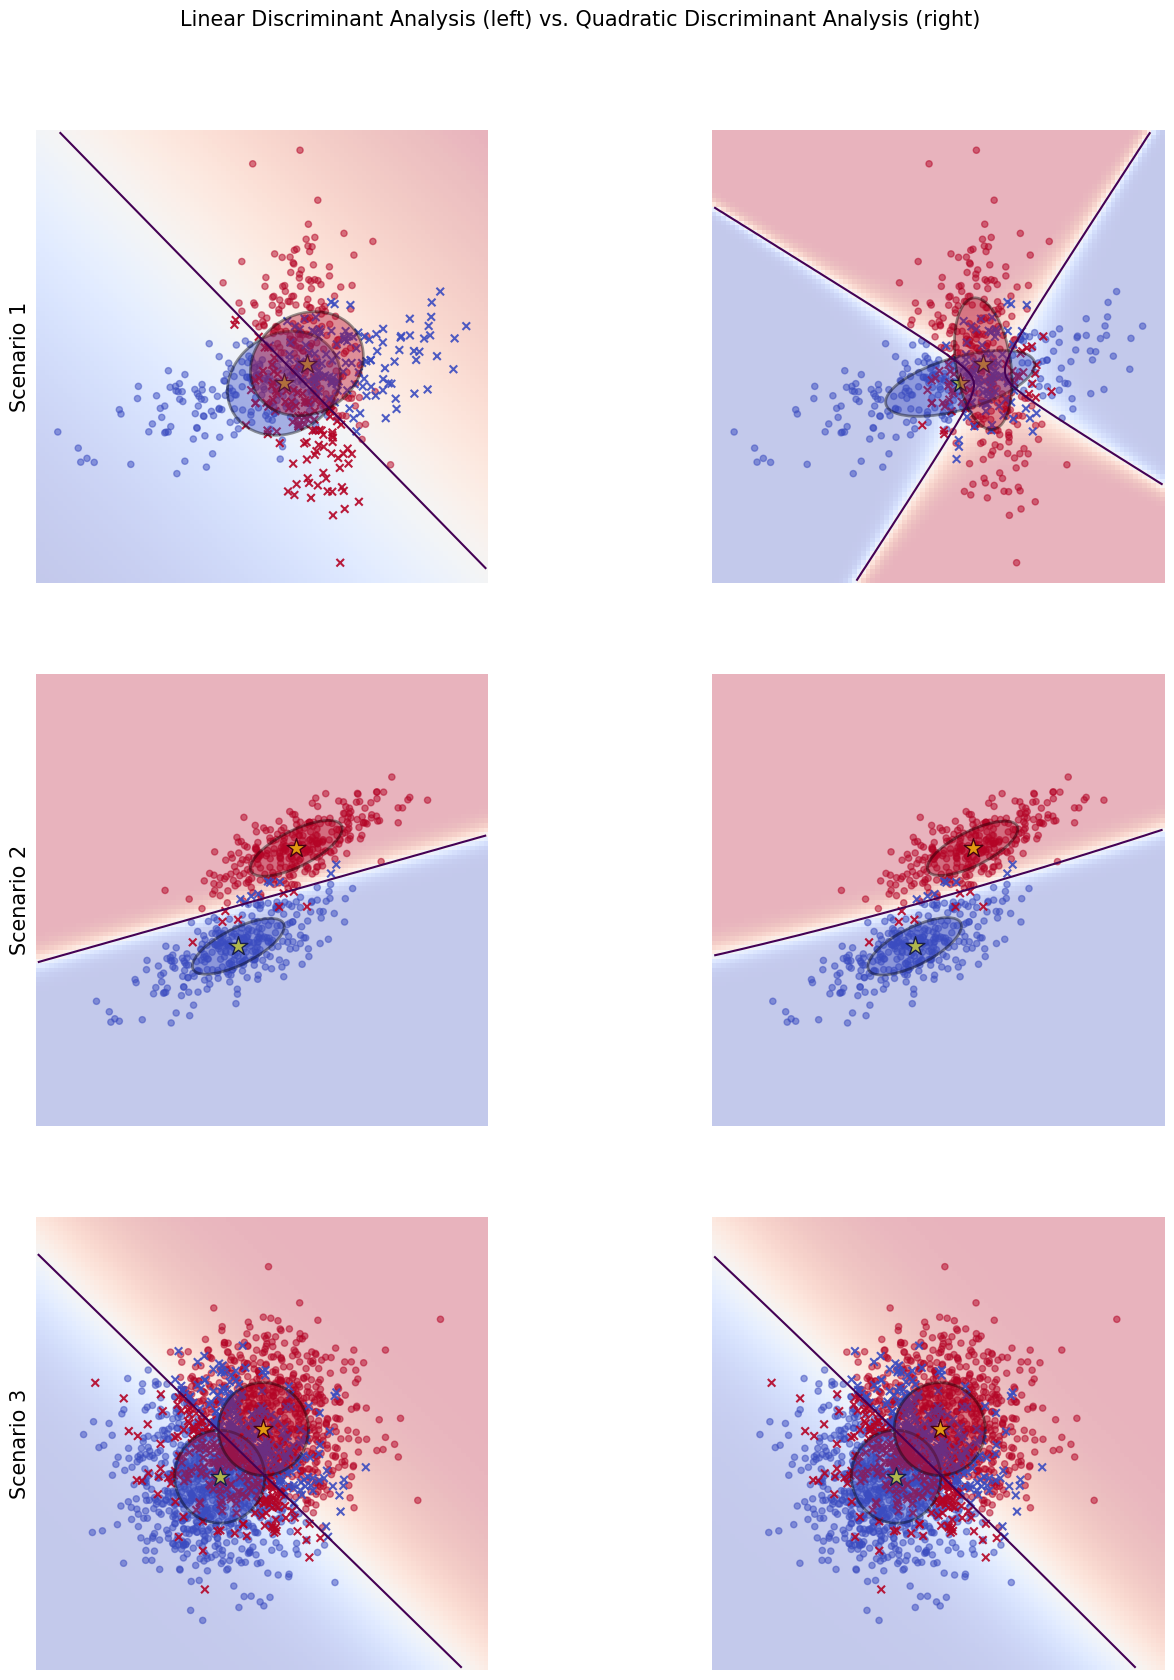

In [26]:
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)

fig, axs = plt.subplots(nrows=3, ncols=2, sharex="row", sharey="row", figsize=(16,20))
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
qda = QuadraticDiscriminantAnalysis(store_covariance=True)

for ax_row, X, y in zip(
    axs,
    (X_1, X_2, X_3),
    (y_1, y_2, y_3),
):
    lda.fit(X, y)
    plot_result(lda, X, y, ax_row[0])
    qda.fit(X, y)
    plot_result(qda, X, y, ax_row[1])

axs[0, 0].set_ylabel("Scenario 1", fontsize=15)
axs[1, 0].set_ylabel("Scenario 2", fontsize=15)
axs[2, 0].set_ylabel("Scenario 3", fontsize=15)
fig.suptitle(
    "Linear Discriminant Analysis (left) vs. Quadratic Discriminant Analysis (right)",
    y=0.94,
    fontsize=15,
)
plt.show()

**Task 7:** As you can see in the scenarios plotted above, LDA (left column) and QDA (right column) do not always result in drastically different decision boundaries. In general, when do they perform similarly, and why? **(1.5 Points)**

Your answer: **TODO**

**Task 7 Answer**:  
LDA and QDA perform similarly when their underlying assumptions about the data converge. Specifically, they produce similar (linear) decision boundaries when the covariance matrices for all classes are nearly identical. This is because LDA is just a simplified version of QDA that makes the assumption of shared covariance. When that assumption is actually true for the data, QDA's more flexible model ends up simplifying itself to be just like LDA.